# Using an All Travel Website's Alexarank(Amazon Web Trends) as a predictor for the website's stock returns

## Installing & Loading Necessary Packages 


In [ ]:
install.packages("rvest") #A Web-Scrapping Package
install.packages("magrittr")
install.packages("stringr")
install.packages("quantmod")
install.packages("RMySQL")
install.packages("dplyr")

library(rvest)
library(magrittr)
library(stringr)
library(quantmod)
library(RMySQL)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: DBI


Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The foll

## Loading the scrapped data from Alexarank

In [ ]:
queryMySQL = function(statement) {
  con = dbConnect(MySQL(), host = "147.8.122.231", user = "fina_4359_u3548379", password = "856e7")
  response = dbGetQuery(con,statement)
  dbDisconnect(con)

  return(response)  
}

queryMySQL("show tables in writeable_fina_4359_u3548379")

#lapply(dbListConnections(dbDriver( drv = "MySQL")), dbDisconnect)

Tables_in_writeable_fina_4359_u3548379
<chr>
JETS
TSA
alexarank_daily_by_individual_companies
alexarank_daily_cummulative
alexarank_weekly_cummulative
google_trends_weekly_data
visits


In [ ]:
con = dbConnect(MySQL(), host = "147.8.122.231", user = "fina_4359_u3548379", password = "856e7", dbname = "writeable_fina_4359_u3548379")
amazon_trends = queryMySQL("select * from writeable_fina_4359_u3548379.alexarank_weekly_cummulative")

In [ ]:
amazon_trends$date = substr(amazon_trends$Date,1,10)
amazon_trends$date = as.Date(amazon_trends$date)
head(amazon_trends)

,Date,Weekly Sum PageViews - PerMillion,Weekly Sum PageViews - PerUser,Weekly Sum Reach - PerMillion,Weekly Average PageViews - PerMillion,Weekly Average PageViews - PerUser,Weekly Average Reach - PerMillion,date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,2019-12-30,12168.7,258.9,92516,1738.386,36.98571,13216.57,2019-12-30
2,2020-01-06,11598.4,267.6,91950,1656.914,38.22857,13135.71,2020-01-06
3,2020-01-13,11766.8,261.7,91850,1680.971,37.38571,13121.43,2020-01-13
4,2020-01-20,11309.9,264.7,90412,1615.700,37.81429,12916.00,2020-01-20
5,2020-01-27,10664.6,266.2,87040,1523.514,38.02857,12434.29,2020-01-27
6,2020-02-03,11102.5,269.0,90100,1586.071,38.42857,12871.43,2020-02-03


## Choosing and Downloading Travel Company Stock Data (TRIP, BKNG, ABNB,  EXPE, TRVG)
Choose which website from the array websites provided and run these cells individually.

In [ ]:
websites=c("Tripadvisor", "Booking","Trip", "Expedia","Hotels", "Airbnb", "Agoda", "Priceline", "Skyscanner", "Trivago")

website = websites[4]

tickers = c("TRIP", "BKNG", "ABNB", "EXPE", "TRVG")

chosen <- 
    if (website == "Tripadvisor" || website == "Trip" ) "TRIP" else
    if (website == "Booking" || website == "Agoda" || website == "Priceline" || website == "Skyscanner") "BKNG" else
    if (website == "Expedia" || website == "Hotels")  "EXPE" else
    if (website == "Airbnb")  "ABNB" else
    if (website == "Trivago")  "TRVG" else
    "Unknown combination"

print(paste("Chosen Ticker:",chosen))

getSymbols(chosen)
ticker = eval(parse(text=chosen))[,-c(1:5)]
colnames(ticker)[1] = "price"

adj_JETS = data.frame(date = as.Date("1990-01-01"), price = 0)
for (num_row in 1:nrow(ticker)) {
  adj_JETS[num_row,1] = index(ticker)[num_row]
  adj_JETS[num_row,2] = ticker[num_row,1]
}

tail(adj_JETS)

[1] "Chosen Ticker: EXPE"


‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "EXPE"

,date,price
,<date>,<dbl>
3618,2021-05-17,169.45
3619,2021-05-18,168.10
3620,2021-05-19,167.07
3621,2021-05-20,169.14
3622,2021-05-21,168.06
3623,2021-05-24,171.10


## Downloading S&P 500 Data

In [ ]:
getSymbols("^GSPC")

SPX = GSPC[,-c(1:5)]
colnames(SPX)[1] = "price"

adj_SPX = data.frame(date = as.Date("1990-01-01"), price = 0)
for (num_row in 1:nrow(SPX)) {
  adj_SPX[num_row,1] = index(SPX)[num_row]
  adj_SPX[num_row,2] = SPX[num_row,1]
}

tail(adj_SPX)

[1] "^GSPC"

,date,price
,<date>,<dbl>
3618,2021-05-17,4163.29
3619,2021-05-18,4127.83
3620,2021-05-19,4115.68
3621,2021-05-20,4159.12
3622,2021-05-21,4155.86
3623,2021-05-24,4197.05


## Downloading Risk-Free Rate (10Y US Govn't Treasuries Yield)

In [ ]:
getSymbols("DGS10", src = "FRED")

rf = data.frame(date = as.Date("1990-01-01"), yield = 0)


for (num_row in 1:nrow(DGS10)) {
  rf[num_row,1] = index(DGS10)[num_row]
  rf[num_row,2] = DGS10[num_row,1]
}

#Linearly Interpolating Missing Value
  
for (num_row in 2:nrow(rf)) {
  if (is.na(rf[num_row,2]) == TRUE) {
    rf[num_row,2] = (rf[num_row-1,2] + rf[num_row+1,2])/2
  }
}

head(rf)

[1] "DGS10"

,date,yield
,<date>,<dbl>
1,1962-01-02,4.06
2,1962-01-03,4.03
3,1962-01-04,3.99
4,1962-01-05,4.02
5,1962-01-08,4.03
6,1962-01-09,4.05


## Merging Daily Individual Stock Data & Alexarank Data 

In [ ]:
amazon_trends_cummulative = amazon_trends %>% select(date, "Weekly Sum PageViews - PerMillion", "Weekly Sum Reach - PerMillion")
head(amazon_trends_cummulative)

,date,Weekly Sum PageViews - PerMillion,Weekly Sum Reach - PerMillion
,<date>,<dbl>,<dbl>
1,2019-12-30,12168.7,92516
2,2020-01-06,11598.4,91950
3,2020-01-13,11766.8,91850
4,2020-01-20,11309.9,90412
5,2020-01-27,10664.6,87040
6,2020-02-03,11102.5,90100


In [ ]:
merge(adj_JETS, amazon_trends_cummulative, by = "date", all.x = TRUE) %>% merge(adj_SPX, by = "date", all.x = TRUE) %>% merge(rf, by = "date", all.x = TRUE) -> regression_data
colnames(regression_data)[c(2,5)] = c(paste(chosen,"_price",sep=""), "SPX")
head(regression_data)

,date,EXPE_price,Weekly Sum PageViews - PerMillion,Weekly Sum Reach - PerMillion,SPX,yield
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-03,27.72853,NA,NA,1416.60,4.67
2,2007-01-04,28.01834,NA,NA,1418.34,4.62
3,2007-01-05,28.00517,NA,NA,1409.71,4.65
4,2007-01-08,28.15007,NA,NA,1412.84,4.66
5,2007-01-09,28.21593,NA,NA,1412.11,4.66
6,2007-01-10,28.29496,NA,NA,1414.85,4.69


## Transform Daily Data into Weekly Data

In [ ]:
temp_JETS <- as.xts(regression_data[paste(chosen,"_price",sep="")], order.by = as.Date(regression_data$date)) %>% to.weekly(indexAt = "startof") 
temp_JETS <- temp_JETS["2019-12-30/2021"]

temp_SPX <- as.xts(regression_data$SPX, order.by = as.Date(regression_data$date)) %>% to.weekly(indexAt = "startof") 
temp_SPX <- temp_SPX["2019-12-30/2021"]

temp_yield <- as.xts(regression_data$yield, order.by = as.Date(regression_data$date)) %>% to.weekly(indexAt = "startof")
temp_yield <- temp_yield["2019-12-30/2021"]

temp_g_trends <- as.xts(amazon_trends_cummulative["Weekly Sum PageViews - PerMillion"], order.by = as.Date(amazon_trends_cummulative$date)) %>% to.weekly(indexAt = "startof")
temp_g_trends <- temp_g_trends["2019-12-30/2021"]

temp_g_trends_avg <- as.xts(amazon_trends_cummulative["Weekly Sum Reach - PerMillion"], order.by = as.Date(amazon_trends_cummulative$date)) %>% to.weekly(indexAt = "startof")
temp_g_trends_avg <- temp_g_trends_avg["2019-12-30/2021"]

regression_data_weekly = data.frame(date = as.Date("1990-01-01"), placeholder_name = 0, Amazon_Pageview_PerMillion =0, Amazon_Reach_PerMillion =0, SPX = 0, yield = 0)

for (i in 1:nrow(temp_g_trends)) {
  regression_data_weekly[i,1] = index(temp_g_trends)[i]  
  regression_data_weekly[i,2] = temp_JETS[i,4]
  regression_data_weekly[i,3] = temp_g_trends[i,1]
  regression_data_weekly[i,4] = temp_g_trends_avg[i,1]
  regression_data_weekly[i,5] = temp_SPX[i,1]
  regression_data_weekly[i,6] = temp_yield[i,1]
}

if (Sys.Date() >= regression_data_weekly[nrow(temp_g_trends),1]) {
  regression_data_weekly <- regression_data_weekly[-nrow(temp_g_trends),]
}

names(regression_data_weekly)[names(regression_data_weekly) == "placeholder_name"] <- paste(chosen,"_closing_price",sep="")

head(regression_data_weekly,20)

Warning message in to.period(x, "weeks", name = name, ...):
“missing values removed from data”


,date,EXPE_closing_price,Amazon_Pageview_PerMillion,Amazon_Reach_PerMillion,SPX,yield
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-30,108.72603,12168.70,92516,3221.29,1.90
2,2020-01-06,110.28027,11598.40,91950,3246.28,1.81
3,2020-01-13,111.40608,11766.80,91850,3288.13,1.85
4,2020-01-20,111.72489,11309.90,90412,3320.79,1.78
5,2020-01-27,108.04855,10664.60,87040,3243.63,1.61
6,2020-02-03,109.68248,11102.50,90100,3248.92,1.54
7,2020-02-10,122.34544,11487.90,89604,3352.09,1.56
8,2020-02-17,119.67535,10940.00,90281,3370.29,1.55
9,2020-02-24,98.25494,10253.70,83812,3225.89,1.38


# Prepare Data for Regression - "PageView"

In [ ]:
to_regress = data.frame(date = as.Date("1990-01-01"), JETS_weekly_return = 0, Amazon_Pageview_Weekly_Change =0, Amazon_Reach_Weekly_Change=0,SPX_weekly_return = 0,JETS_weekly_excess_return=0,	SPX_weekly_excess_return =0, JETS_rebased = 0, Amazon_Trends_rebased=0, SPX_rebased=0)
for(i in 1:nrow(regression_data_weekly))
{
   if (i == 1) {
      to_regress[i,1] = regression_data_weekly[i,1]
      to_regress[i,8] = 1
      to_regress[i,9] = 1
      to_regress[i,10] = 1
    } 
    else{
 to_regress[i,1] = regression_data_weekly[i,1]
 to_regress[i,2] = (regression_data_weekly[i,2]-regression_data_weekly[i-1,2])/regression_data_weekly[i-1,2]
 to_regress[i,3] = (regression_data_weekly[i,3]-regression_data_weekly[i-1,3])/regression_data_weekly[i-1,3]
 to_regress[i,4] = (regression_data_weekly[i,4]-regression_data_weekly[i-1,4])/regression_data_weekly[i-1,4]
 to_regress[i,5] = (regression_data_weekly[i,5]-regression_data_weekly[i-1,5])/regression_data_weekly[i-1,5]
 to_regress[i,6] = (regression_data_weekly[i,2]-regression_data_weekly[i-1,2])/regression_data_weekly[i-1,2] - regression_data_weekly[i,6]/52/100
 to_regress[i,7] = (regression_data_weekly[i,5]-regression_data_weekly[i-1,5])/regression_data_weekly[i-1,5] - regression_data_weekly[i,6]/52/100
 to_regress[i,8] = to_regress[i-1,8] * (1 + to_regress[i,2])
 to_regress[i,9] = to_regress[i-1,9] * (1 + to_regress[i,3])
 to_regress[i,10] = to_regress[i-1,10] * (1 + to_regress[i,5])
    }
}
names(to_regress)[names(to_regress) == "JETS_weekly_return"] <- paste(chosen,"_weekly_return",sep="")
names(to_regress)[names(to_regress) == "JETS_weekly_excess_return"] <- paste(chosen,"_weekly_excess_return",sep="")
names(to_regress)[names(to_regress) == "JETS_rebased"] <- paste(chosen,"_rebased",sep="")
tail(to_regress,20)




,date,EXPE_weekly_return,Amazon_Pageview_Weekly_Change,Amazon_Reach_Weekly_Change,SPX_weekly_return,EXPE_weekly_excess_return,SPX_weekly_excess_return,EXPE_rebased,Amazon_Trends_rebased,SPX_rebased
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,2020-12-28,0.042848102,0.111982592,0.059077601,0.0109448069,0.042667333,0.0107640377,1.217740,0.7433169,1.159585
54,2021-01-04,0.087764430,-0.100625746,-0.088237804,-0.0092923317,0.087585584,-0.0094711778,1.324614,0.6685201,1.148810
55,2021-01-11,-0.023121802,-0.186674403,-0.039096422,0.0267413043,-0.023342956,0.0265201504,1.293986,0.5437245,1.179531
56,2021-01-18,-0.029639619,-0.002159778,-0.034123444,-0.0001842807,-0.029851157,-0.0003958192,1.255633,0.5425501,1.179313
57,2021-01-25,-0.090975723,0.099842021,0.054848662,0.0148595772,-0.091177646,0.0146576541,1.141401,0.5967195,1.196837
58,2021-02-01,0.139403677,-0.039721537,-0.035384527,-0.0211394001,0.139194061,-0.0213490155,1.300517,0.5730168,1.171537
59,2021-02-08,0.036138622,0.065859538,0.067162109,0.0375557061,0.035909776,0.0373268599,1.347515,0.6107555,1.215535
60,2021-02-15,0.084704139,0.118660944,0.058998310,0.0043416189,0.084454139,0.0040916189,1.461656,0.6832283,1.220812
61,2021-02-22,0.013088359,0.027014674,0.027934626,-0.0142628870,0.012824898,-0.0145263485,1.480786,0.7016855,1.203400


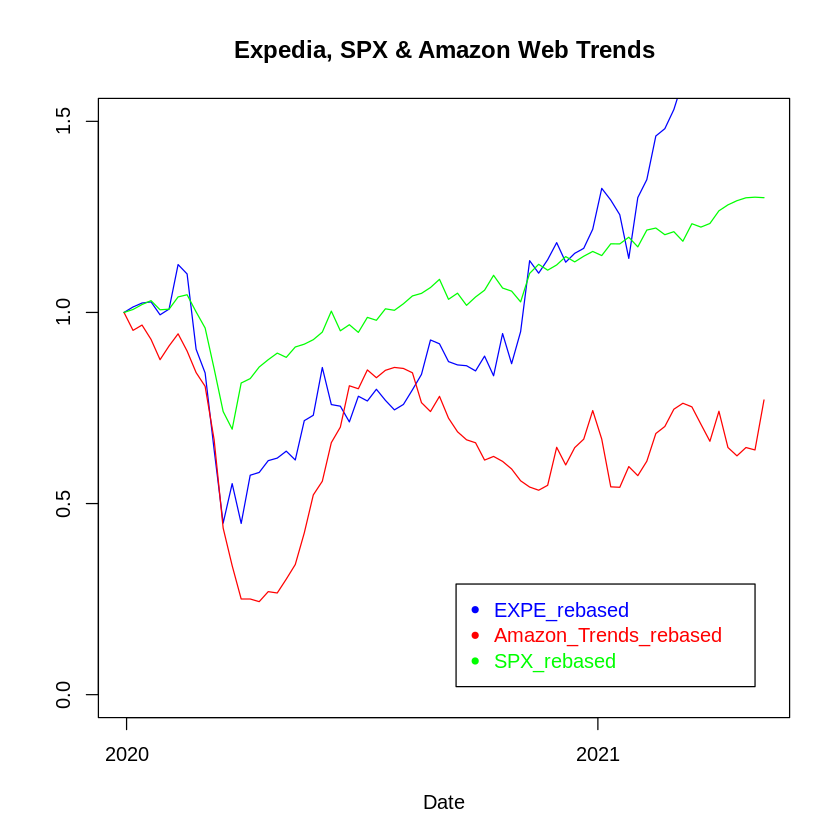

In [ ]:
plot(x = to_regress[,1], y = to_regress[,8], type = "l", col = "blue", ylim = c(0,1.5), xlab = "Date", ylab = "", main = paste0(website, ", SPX & Amazon Web Trends"))
lines(x = to_regress[,1], y = to_regress[,9], type = "l", col = "red")
lines(x = to_regress[,1], y = to_regress[,10], type = "l", col = "green")
legend("bottomright", 
        legend = colnames(to_regress)[8:10], 
        col = c("blue", "red", "green"),  
        pch = 20, 
        bty = "o", 
        pt.cex = 1, 
        cex = 1, 
        text.col = c("blue", "red", "green"), 
        inset = c(0.05, 0.05))

## Regressing Arithmetic Weekly Chosen Stock Return - CAPM


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 6])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117162 -0.017224  0.003377  0.016305  0.181461 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)     0.003743   0.004506   0.831    0.409
to_regress[, 6] 0.059511   0.048772   1.220    0.226

Residual standard error: 0.03799 on 70 degrees of freedom
Multiple R-squared:  0.02083,	Adjusted R-squared:  0.006838 
F-statistic: 1.489 on 1 and 70 DF,  p-value: 0.2265


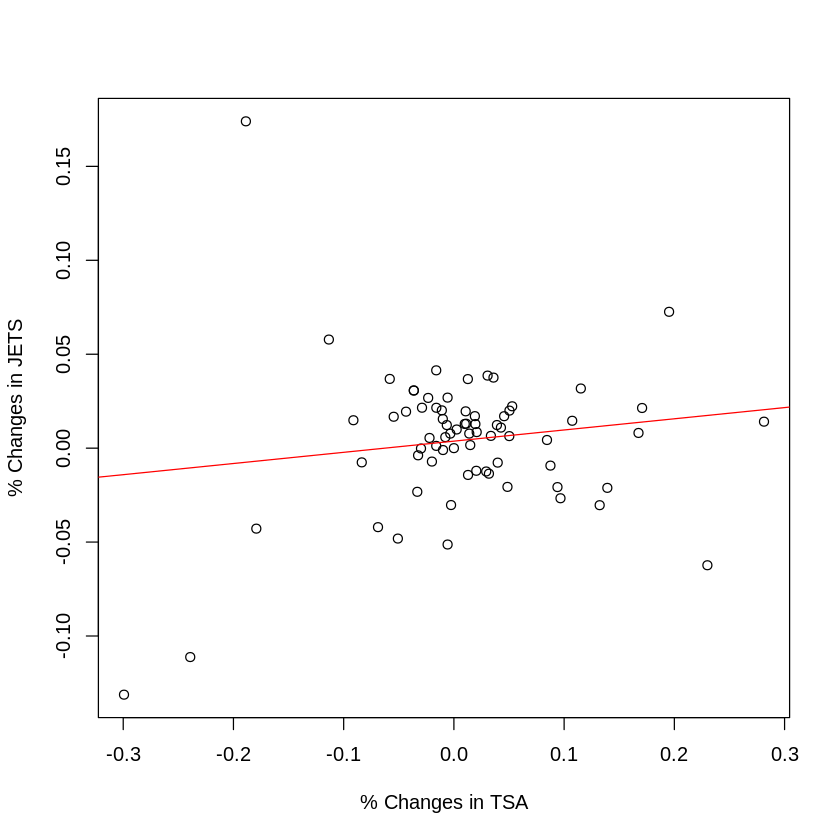

In [ ]:
lm_result_1 = lm(to_regress[,5] ~ to_regress[,6]) # i.e. CAPM
summary(lm_result_1)

plot(to_regress[,5] ~ to_regress[,6], xlab = "% Changes in TSA", ylab = "% Changes in JETS")
abline(lm_result_1, col="red")

## Regressing Arithmetic Weekly Individual Travel Website Stock Return - Alaxarank(Amazon Web Traffic)

In [ ]:
lm_result_2 = lm(to_regress[,5] ~ to_regress[,3])
summary(lm_result_2)


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 3])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106813 -0.023440  0.000498  0.016119  0.169838 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.004119   0.004247   0.970  0.33547   
to_regress[, 3] 0.126380   0.041084   3.076  0.00299 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03603 on 70 degrees of freedom
Multiple R-squared:  0.1191,	Adjusted R-squared:  0.1065 
F-statistic: 9.463 on 1 and 70 DF,  p-value: 0.002991


## Regressing Arithmetic Weekly Individual Travel Website Stock Return - "Improved CAPM with Alexarank - Amazon Web Traffic"

In [ ]:
lm_result_3 = lm(to_regress[,5] ~ to_regress[,6] + to_regress[,3]) #"Improved Version 1"
summary(lm_result_3)


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 6] + to_regress[, 
    3])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095565 -0.021246  0.000993  0.017596  0.171725 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     0.003858   0.004238   0.910   0.3659  
to_regress[, 6] 0.082712   0.068019   1.216   0.2281  
to_regress[, 3] 0.112125   0.042589   2.633   0.0104 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03591 on 69 degrees of freedom
Multiple R-squared:  0.1376,	Adjusted R-squared:  0.1126 
F-statistic: 5.503 on 2 and 69 DF,  p-value: 0.006061


# Prepare Data for Regression - "Reach"

In [ ]:
to_regress = data.frame(date = as.Date("1990-01-01"), JETS_weekly_return = 0, Amazon_Pageview_Weekly_Change =0, Amazon_Reach_Weekly_Change=0,SPX_weekly_return = 0,JETS_weekly_excess_return=0,	SPX_weekly_excess_return =0, JETS_rebased = 0, Amazon_Reach_rebased=0, SPX_rebased=0)
for(i in 1:nrow(regression_data_weekly))
{
   if (i == 1) {
      to_regress[i,1] = regression_data_weekly[i,1]
      to_regress[i,8] = 1
      to_regress[i,9] = 1
      to_regress[i,10] = 1
    } 
    else{
 to_regress[i,1] = regression_data_weekly[i,1]
 to_regress[i,2] = (regression_data_weekly[i,2]-regression_data_weekly[i-1,2])/regression_data_weekly[i-1,2]
 to_regress[i,3] = (regression_data_weekly[i,3]-regression_data_weekly[i-1,3])/regression_data_weekly[i-1,3]
 to_regress[i,4] = (regression_data_weekly[i,4]-regression_data_weekly[i-1,4])/regression_data_weekly[i-1,4]
 to_regress[i,5] = (regression_data_weekly[i,5]-regression_data_weekly[i-1,5])/regression_data_weekly[i-1,5]
 to_regress[i,6] = (regression_data_weekly[i,2]-regression_data_weekly[i-1,2])/regression_data_weekly[i-1,2] - regression_data_weekly[i,6]/52/100
 to_regress[i,7] = (regression_data_weekly[i,5]-regression_data_weekly[i-1,5])/regression_data_weekly[i-1,5] - regression_data_weekly[i,6]/52/100
 to_regress[i,8] = to_regress[i-1,8] * (1 + to_regress[i,2])
 to_regress[i,9] = to_regress[i-1,9] * (1 + to_regress[i,4])
 to_regress[i,10] = to_regress[i-1,10] * (1 + to_regress[i,5])
    }
}
names(to_regress)[names(to_regress) == "JETS_weekly_return"] <- paste(chosen,"_weekly_return",sep="")
names(to_regress)[names(to_regress) == "JETS_weekly_excess_return"] <- paste(chosen,"_weekly_excess_return",sep="")
names(to_regress)[names(to_regress) == "JETS_rebased"] <- paste(chosen,"_rebased",sep="")
tail(to_regress,20)




,date,EXPE_weekly_return,Amazon_Pageview_Weekly_Change,Amazon_Reach_Weekly_Change,SPX_weekly_return,EXPE_weekly_excess_return,SPX_weekly_excess_return,EXPE_rebased,Amazon_Reach_rebased,SPX_rebased
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,2020-12-28,0.042848102,0.111982592,0.059077601,0.0109448069,0.042667333,0.0107640377,1.217740,0.6334364,1.159585
54,2021-01-04,0.087764430,-0.100625746,-0.088237804,-0.0092923317,0.087585584,-0.0094711778,1.324614,0.5775433,1.148810
55,2021-01-11,-0.023121802,-0.186674403,-0.039096422,0.0267413043,-0.023342956,0.0265201504,1.293986,0.5549635,1.179531
56,2021-01-18,-0.029639619,-0.002159778,-0.034123444,-0.0001842807,-0.029851157,-0.0003958192,1.255633,0.5360262,1.179313
57,2021-01-25,-0.090975723,0.099842021,0.054848662,0.0148595772,-0.091177646,0.0146576541,1.141401,0.5654265,1.196837
58,2021-02-01,0.139403677,-0.039721537,-0.035384527,-0.0211394001,0.139194061,-0.0213490155,1.300517,0.5454192,1.171537
59,2021-02-08,0.036138622,0.065859538,0.067162109,0.0375557061,0.035909776,0.0373268599,1.347515,0.5820507,1.215535
60,2021-02-15,0.084704139,0.118660944,0.058998310,0.0043416189,0.084454139,0.0040916189,1.461656,0.6163907,1.220812
61,2021-02-22,0.013088359,0.027014674,0.027934626,-0.0142628870,0.012824898,-0.0145263485,1.480786,0.6336093,1.203400


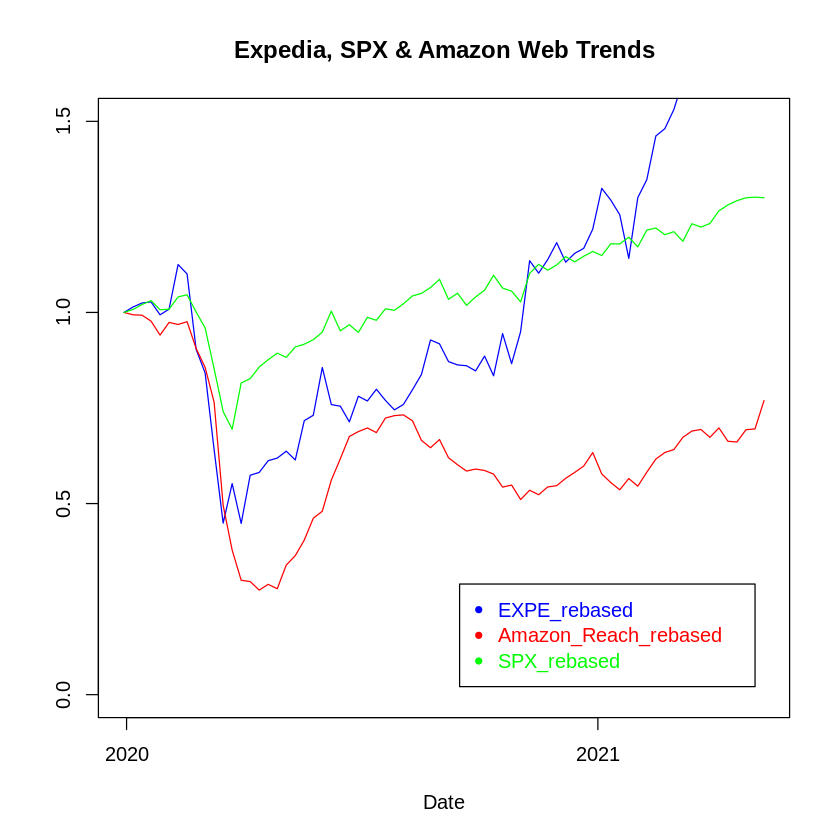

In [ ]:
plot(x = to_regress[,1], y = to_regress[,8], type = "l", col = "blue", ylim = c(0,1.5), xlab = "Date", ylab = "", main = paste0(website, ", SPX & Amazon Web Trends"))
lines(x = to_regress[,1], y = to_regress[,9], type = "l", col = "red")
lines(x = to_regress[,1], y = to_regress[,10], type = "l", col = "green")
legend("bottomright", 
        legend = colnames(to_regress)[8:10], 
        col = c("blue", "red", "green"),  
        pch = 20, 
        bty = "o", 
        pt.cex = 1, 
        cex = 1, 
        text.col = c("blue", "red", "green"), 
        inset = c(0.05, 0.05))

## Regressing Arithmetic Weekly Chosen Stock Return - CAPM


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 6])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117162 -0.017224  0.003377  0.016305  0.181461 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)     0.003743   0.004506   0.831    0.409
to_regress[, 6] 0.059511   0.048772   1.220    0.226

Residual standard error: 0.03799 on 70 degrees of freedom
Multiple R-squared:  0.02083,	Adjusted R-squared:  0.006838 
F-statistic: 1.489 on 1 and 70 DF,  p-value: 0.2265


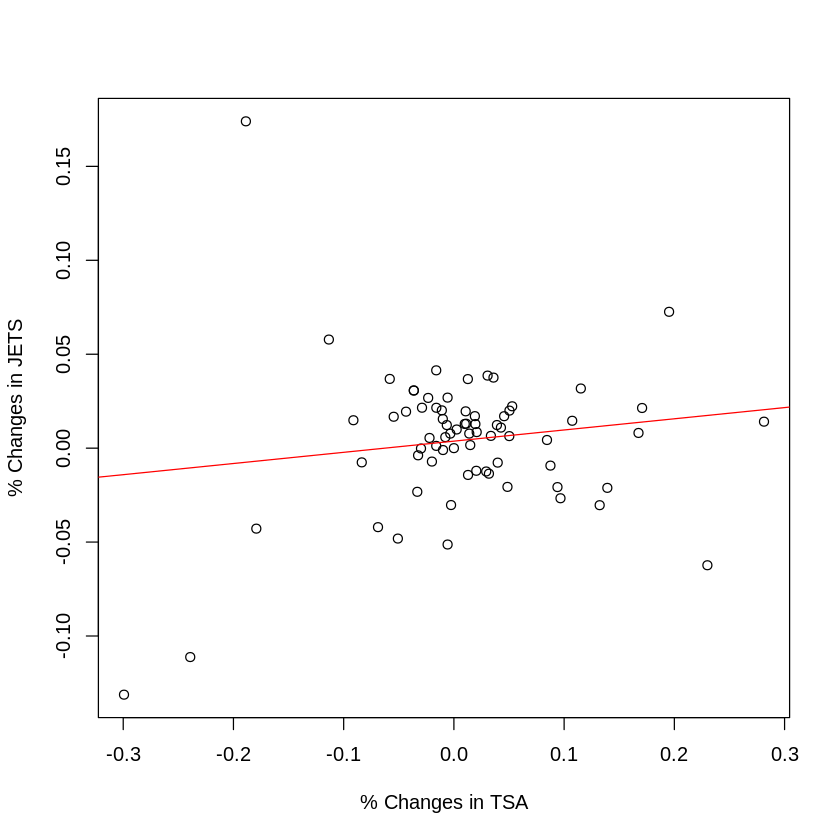

In [ ]:
lm_result_1 = lm(to_regress[,5] ~ to_regress[,6]) # i.e. CAPM
summary(lm_result_1)

plot(to_regress[,5] ~ to_regress[,6], xlab = "% Changes in TSA", ylab = "% Changes in JETS")
abline(lm_result_1, col="red")

## Regressing Arithmetic Weekly Individual Travel Website Stock Return - Alaxarank(Amazon Web Traffic)

In [ ]:
lm_result_2 = lm(to_regress[,5] ~ to_regress[,4])
summary(lm_result_2)


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 3])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106813 -0.023440  0.000498  0.016119  0.169838 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.004119   0.004247   0.970  0.33547   
to_regress[, 3] 0.126380   0.041084   3.076  0.00299 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03603 on 70 degrees of freedom
Multiple R-squared:  0.1191,	Adjusted R-squared:  0.1065 
F-statistic: 9.463 on 1 and 70 DF,  p-value: 0.002991


## Regressing Arithmetic Weekly Individual Travel Website Stock Return - "Improved CAPM with Alexarank - Amazon Web Traffic"

In [ ]:
lm_result_3 = lm(to_regress[,5] ~ to_regress[,6] + to_regress[,4]) #"Improved Version 1"
summary(lm_result_3)


Call:
lm(formula = to_regress[, 5] ~ to_regress[, 6] + to_regress[, 
    3])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095565 -0.021246  0.000993  0.017596  0.171725 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     0.003858   0.004238   0.910   0.3659  
to_regress[, 6] 0.082712   0.068019   1.216   0.2281  
to_regress[, 3] 0.112125   0.042589   2.633   0.0104 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03591 on 69 degrees of freedom
Multiple R-squared:  0.1376,	Adjusted R-squared:  0.1126 
F-statistic: 5.503 on 2 and 69 DF,  p-value: 0.006061
